# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [73]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [74]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units+" + units+ "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = (city_weather['main']['temp_max'] -273.15)
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sisimiut
Processing Record 2 of Set 1 | yar-sale
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | leninskoye
Processing Record 5 of Set 1 | yantai
Processing Record 6 of Set 1 | polunochnoye
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | palmer
Processing Record 18 of Set 1 | luan
Processing Record 19 of Set 1 | nguiu
City not found. Skipping...
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | asyut

In [1]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'pd' is not defined

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,11.77,65,0,1.81,CL,1680529667
1,punta arenas,-53.1500,-70.9167,10.01,66,40,5.14,CL,1680529730
2,bluff,-46.6000,168.3333,13.05,81,97,6.08,NZ,1680529749
3,ushuaia,-54.8000,-68.3000,13.81,41,0,6.69,AR,1680529749
4,ust-kuyga,70.0167,135.6000,-10.53,97,100,3.36,RU,1680530333


In [ ]:
# Export the City_Data into a csv
csv_path = '/Users/meganflinders/Desktop/Bootcamp/Repos/python-api-challenge/python-api-challenge/Starter_Code 3/output_data/cities.csv'
city_data_df.to_csv(csv_path, index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv(csv_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,11.77,65,0,1.81,CL,1680529667
1,punta arenas,-53.1500,-70.9167,10.01,66,40,5.14,CL,1680529730
2,bluff,-46.6000,168.3333,13.05,81,97,6.08,NZ,1680529749
3,ushuaia,-54.8000,-68.3000,13.81,41,0,6.69,AR,1680529749
4,ust-kuyga,70.0167,135.6000,-10.53,97,100,3.36,RU,1680530333


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

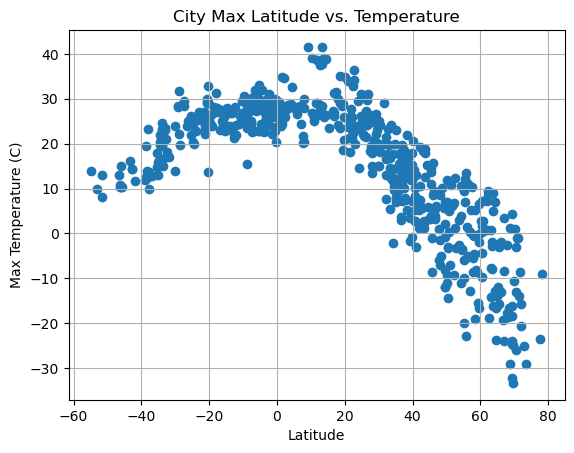

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/meganflinders/Desktop/Bootcamp/Repos/python-api-challenge/python-api-challenge/Starter_Code 3/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

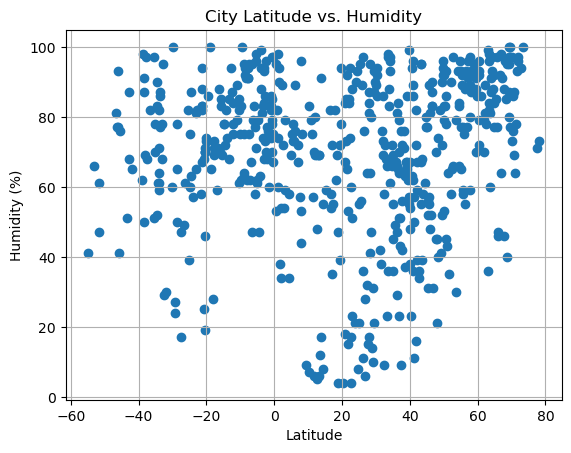

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/meganflinders/Desktop/Bootcamp/Repos/python-api-challenge/python-api-challenge/Starter_Code 3/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

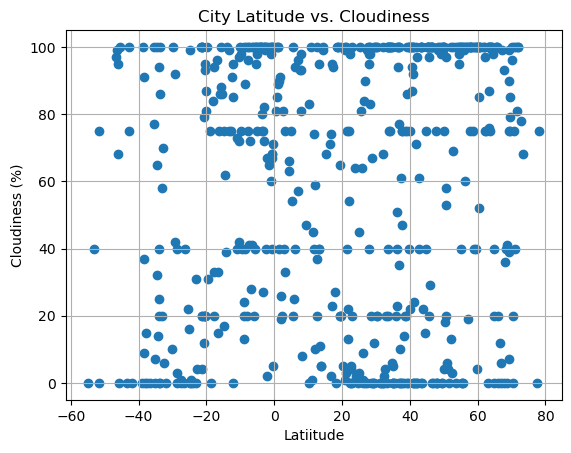

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latiitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/meganflinders/Desktop/Bootcamp/Repos/python-api-challenge/python-api-challenge/Starter_Code 3/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

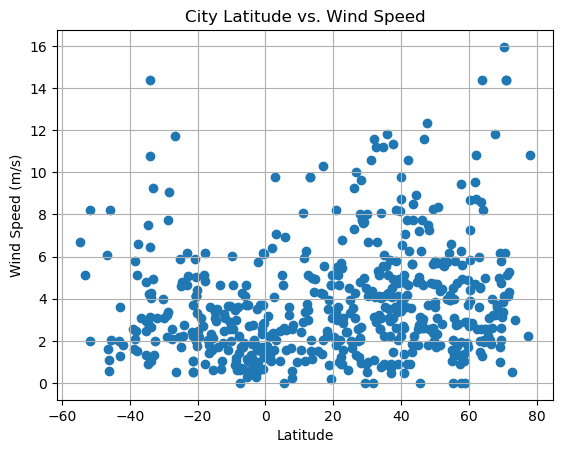

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/meganflinders/Desktop/Bootcamp/Repos/python-api-challenge/python-api-challenge/Starter_Code 3/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
#x_values = 
#y_values = 
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']) >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ust-kuyga,70.0167,135.6000,13.316,97,100,3.36,RU,1680529750
5,raton,36.9034,-104.4391,45.482,23,0,4.12,US,1680529678
6,lowestoft,52.4752,1.7516,54.338,65,3,5.62,GB,1680529751
7,lavrentiya,65.5833,-171.0000,4.136,97,100,2.23,RU,1680529751
8,tommot,58.9564,126.2925,16.790,95,100,2.90,RU,1680529752


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,53.456,65,0,1.81,CL,1680529667
1,punta arenas,-53.1500,-70.9167,50.288,66,40,5.14,CL,1680529730
2,bluff,-46.6000,168.3333,55.760,81,97,6.08,NZ,1680529749
3,ushuaia,-54.8000,-68.3000,57.128,41,0,6.69,AR,1680529749
9,denpasar,-8.6500,115.2167,80.528,94,40,1.03,ID,1680529752


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7585011091795479


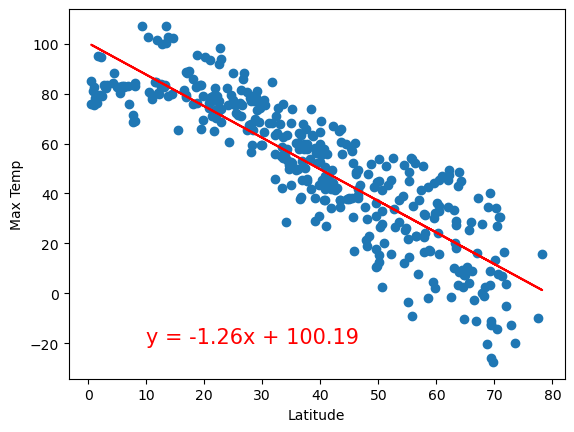

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5194663048447657


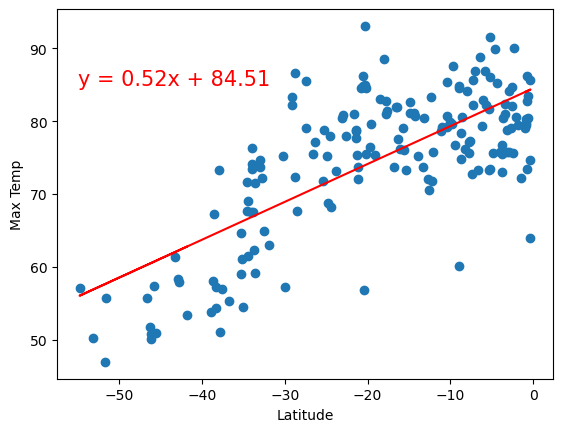

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a fairly strong (r=0.76) negative correlation between the latitude and the max temperatures of the data, meaning that the higher the latitude, or the farther north a city is from the equator, the lower the max temperature that it will experience. While the Southern Hempisphere doesn't have quite as strong of a relationship (r=0.52), we see there is a positive correlation between latitude and max temp, meaning the closer to the equator a city is, the higher the max temperature that they will feel. Inversely, the farther south from the equator a city is, the lower the max temperature of that city.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.10361366953524662


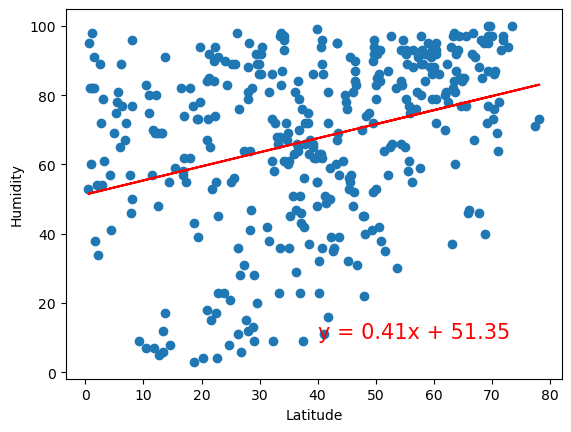

In [ ]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07559874999210565


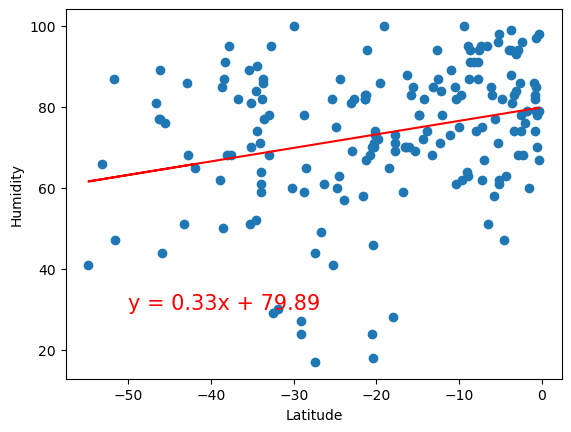

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a weak relationship between a city's latitude and humidity in both the northern and southern hemisphere (r=0.10 r= 0.076, respectively). In the Northern hemisphere, there is a slight positive correlation, where the higher a city's latitude (or distance from the equator), the more humidity they may experience. The same is true in the Southern hemisphere as well: the farther south from the equator a city is, the more humidity they generally may feel. However, because the relationship between these two factors is very weak, we are unable to accurately predict a city's humidity given their latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.014479743702069918


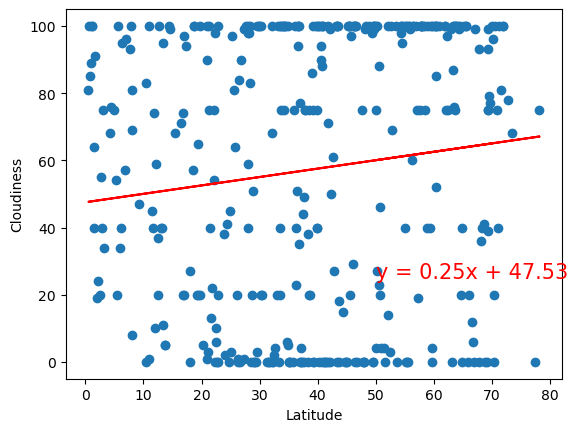

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.13145253306832078


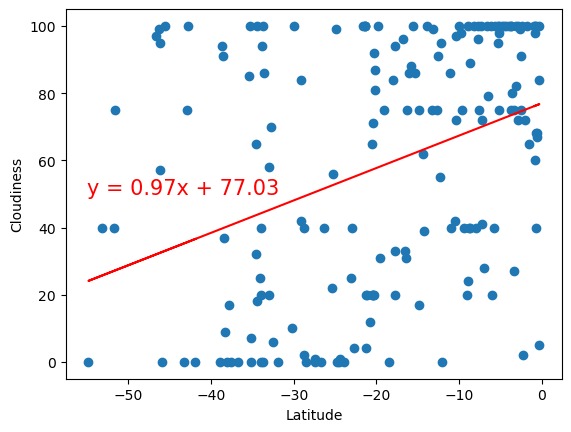

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Again, there is a very weak relationship between a city's latitude and it's cloudiness in both the northern and southern hemispheres (r=0.014, r=0.13, respectively). In the Northern hemisphere, there is a very slight general increase in cloudiness the farther north from the equator a city is, and in the Southern hemisphere, there seems to be a slight increase in general cloudiness the closer a city is to the equator (higher latitude).

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.017464909064821326


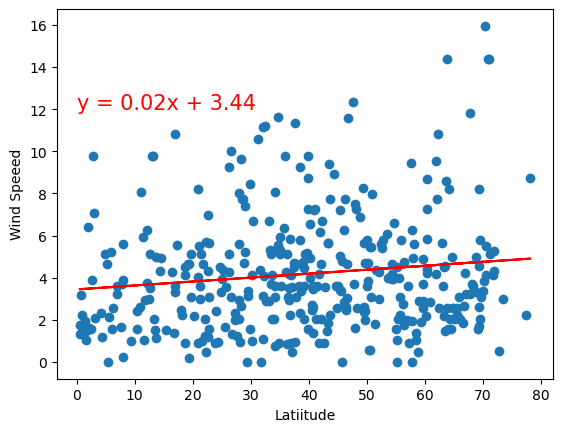

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latiitude')
plt.ylabel('Wind Speeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.11991221016721437


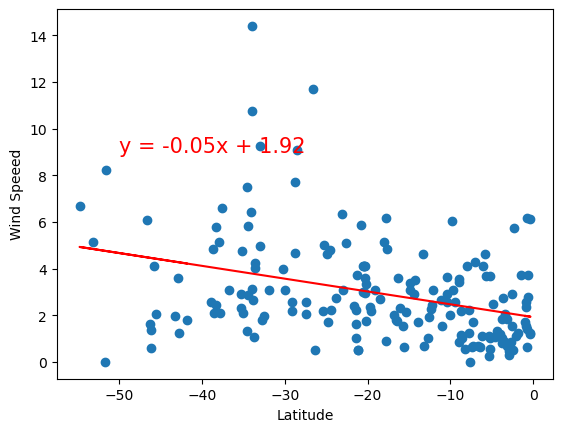

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** We see some more fairly weak relationships between a city's latitude and wind speeds in both the Northern and Southern hemispheres (r=0.017, r= 0.12, respectively). In the northern hemisphere, there is a slight increase in wind speed the farther north from the equator a city is. In the southern hemisphere, there is a slight increase in wind speed the farther south from the eqautor a city is. 